In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random 
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available", len(physical_devices))

Num GPUs Available 1


In [3]:

directory = "./FACD_image"

classes = ["1977", "Amaro", "Apollo", "Brannan", "Earlybird"]
target_size = (224,224)
seed = 42;


train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, validation_split=0.2) \
    .flow_from_directory(directory=directory, target_size=target_size, classes=classes, batch_size=10, subset='training')
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, validation_split=0.2) \
    .flow_from_directory(directory=directory, target_size=target_size, classes=classes, batch_size=10, subset='validation')
#test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
#    .flow_from_directory(directory=directory, target_size=target_size, classes=classes, batch_size=10, shuffle=False)
        

Found 5120 images belonging to 5 classes.
Found 1280 images belonging to 5 classes.


In [4]:
imgs, labels = next(train_batches)

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

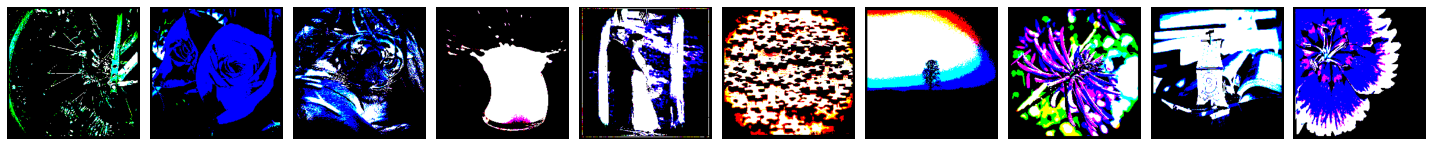

In [6]:
plotImages(imgs)

In [7]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)), 
    MaxPool2D(pool_size=(2, 2), strides=2), 
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'), 
    MaxPool2D(pool_size=(2,2), strides=2), 
    Flatten(), 
    Dense(units=len(classes), activation='softmax'),
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 5)                 1003525   
Total params: 1,022,917
Trainable params: 1,022,917
Non-trainable params: 0
______________________________________________

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 512 steps, validate for 128 steps
Epoch 1/10
512/512 - 118s - loss: 12.4796 - accuracy: 0.6740 - val_loss: 1.0813 - val_accuracy: 0.8469
Epoch 2/10
512/512 - 91s - loss: 0.7273 - accuracy: 0.8715 - val_loss: 1.3158 - val_accuracy: 0.8109
Epoch 3/10
512/512 - 91s - loss: 0.3748 - accuracy: 0.9117 - val_loss: 0.6864 - val_accuracy: 0.8867
Epoch 4/10
512/512 - 88s - loss: 0.2458 - accuracy: 0.9416 - val_loss: 0.5164 - val_accuracy: 0.9023
Epoch 5/10
512/512 - 89s - loss: 0.2009 - accuracy: 0.9529 - val_loss: 0.6255 - val_accuracy: 0.8844
Epoch 6/10
512/512 - 93s - loss: 0.1469 - accuracy: 0.9594 - val_loss: 0.6309 - val_accuracy: 0.8805
Epoch 7/10
512/512 - 92s - loss: 0.1740 - accuracy: 0.9584 - val_loss: 0.5894 - val_accuracy: 0.8953
Epoch 8/10
512/512 - 91s - loss: 0.2064 - accuracy: 0.9553 - val_loss: 0.4601 - val_accuracy: 0.9117
Epoch 9/10
512/512 - 90s - loss: 0.1458 - accuracy: 0.9635 - val_loss: 0.5258 - val_accuracy: 0.

In [11]:
filepath = "./first_try_dennis.hdf5"

model.save(
   filepath, overwrite=True, include_optimizer=True, save_format="h5",
    signatures=None, options=None
)